<a href="https://colab.research.google.com/github/okvironi/feature-engineering-handling/blob/main/PR_DAY4_ANDRE_OKVIRONI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
### Tolong baca perintah dan tagar komen dengan saksama :)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install feature_engine #digunakan untuk melakukan teknik-teknik pembersihan, transformasi, dan rekayasa fitur (feature engineering) dalam analisis data dan pemrosesan data.

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [14]:
# untuk plot Q-Q
import scipy.stats as stats

In [17]:
df_california = pd.read_csv('california_dataset.csv')
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
from sklearn.model_selection import train_test_split
train_clfr, test_clfr = train_test_split(df_california, test_size = 0.2, random_state=42)
# splitting terlebih dahulu


#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

In [22]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek

df_california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [23]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

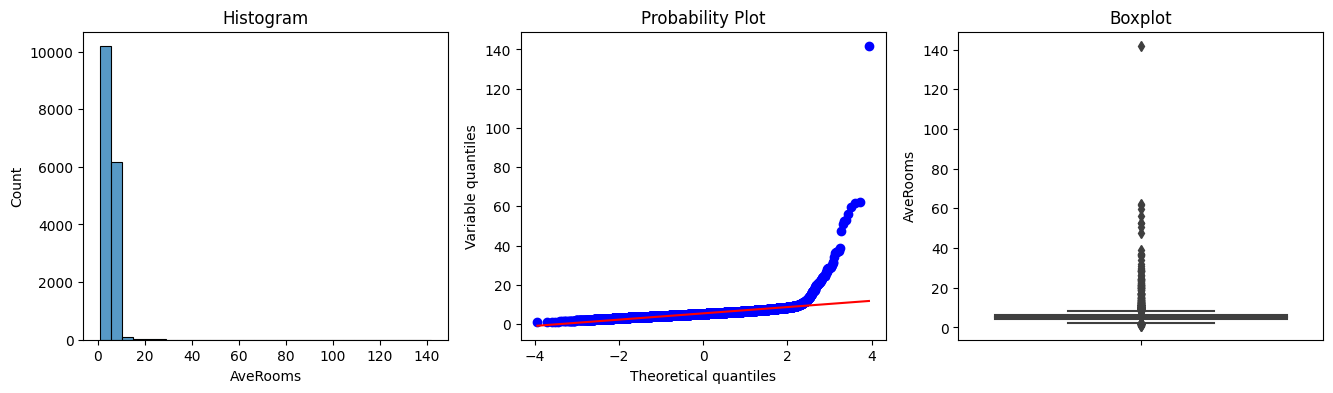

In [36]:
# memvisualisasikan outlier di LSTAT
check_plot(train_clfr, 'AveRooms') #HouseAge sample --> ganti ke AveRoom karena data houseage sudah bagus

### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali

In [43]:
### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali

def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR dihitung sebagai selisih antara kuartil atas (Q3) dan kuartil bawah (Q1).

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5) #Batas bawah outlier dihitung dengan mengurangkan 1.5 kali nilai IQR dari kuartil bawah (Q1)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [44]:
# batas untuk LSTAT

AveRooms_upper_limit, AveRooms_lower_limit = find_outlier_boundary(train_clfr, 'AveRooms')
AveRooms_upper_limit, AveRooms_lower_limit

(8.474509781463325, 2.0385818023548827)

In [46]:
# ganti outlier dengan batas maksimum dan minimum

train_clfr['AveRooms']= np.where(train_clfr['AveRooms'] > AveRooms_upper_limit, AveRooms_upper_limit, #ganti dengan batas atas
                       np.where(train_clfr['AveRooms'] < AveRooms_lower_limit, AveRooms_lower_limit, train_clfr['AveRooms'])) #ganti dengan batas bawah

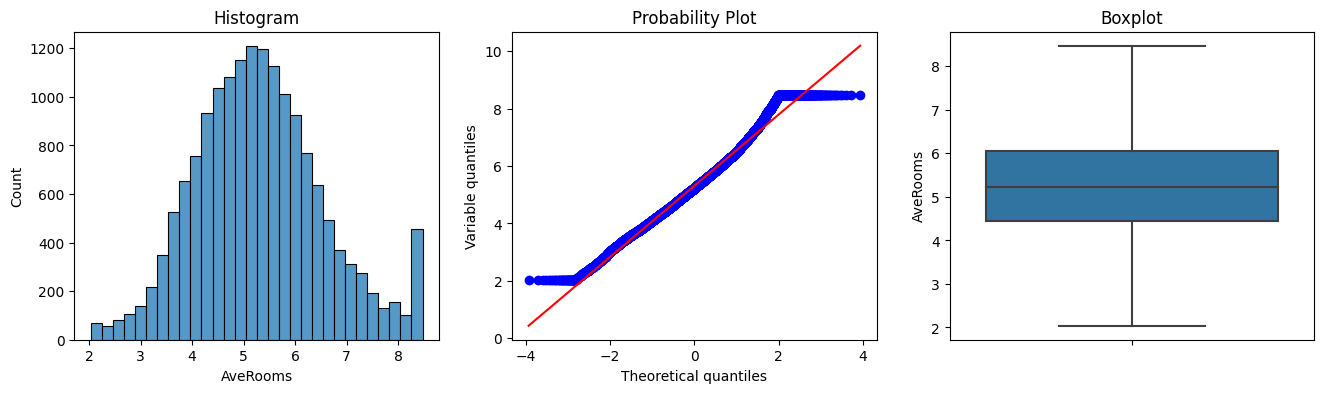

In [47]:
# Melakukan loop untuk mengecek distribusi tiap kolom
# memvisualisasikan outlier di LSTAT
check_plot(train_clfr, 'AveRooms')

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [49]:
df_company = pd.read_csv('company.csv')

In [50]:
df_company.info() #check tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        672 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [51]:
df_company.isna().sum()

Revenue         0
Size            0
Rating          0
Headquarters    0
dtype: int64

In [52]:
df_company.columns

Index(['Revenue', 'Size', 'Rating', 'Headquarters'], dtype='object')

In [53]:
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64


============= Size =================


51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64


============= Rating =================


 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: Rating, dtype: int64


============= Headquarters =================


New York, NY                 33
-1                           31
San Francisco, CA            31
Chicago, IL                  23
Boston, MA                   19
Reston, VA                   14
Mc Lean, VA                  13
Westminster, CO              12
Cambridge, United Kingdom    10
Cambridge, MA                10
Vienna, VA                    8
Denver, CO                    7
Herndon, VA                   7
Washington, DC                7
Woodbine, MD                  7
Saint Louis, MO               7
Bedford, MA                   7
Arlington, VA                 7
San Jose, CA                  7
San Antonio, TX               6
Mountain View, CA             6
Basel, Switzerland            6
San Rafael, CA                6
Chantilly, VA                 6
Fairfax, VA                   5
Houston, TX                   5
Pittsburgh, PA                5
Bethesda, MD                  5
Rockville, MD                 5
Los Angeles, CA               5
Springfield, MA               5
Bellevue

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

## Assignment 2. Missing Value Handling :
1. Cek persentase missing value pada kolom Headquarters di company.csv, Cek jenis missing valuenya ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika < 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?

In [59]:
#Tulis jawaban missing value handling kolom Headquarters disini

#cek missing value column Headquarters
100 * len(df_company[df_company['Headquarters'].isin(['-1'])]) / len(df_company) #masukan list missing value pada headquarter --> [-1]

4.613095238095238

In [60]:
#nilai tidak didrop karena diatas 20%
#lanjutkan proses handling

from sklearn.model_selection import train_test_split
train_company, test_company = train_test_split(df_company, test_size = 0.2, random_state=42)
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

In [67]:
#Mode imputation Untuk headquarter --> tipe data object / string sehingga handling dengan modus

train_mode_headquarters = train_company[~train_company['Headquarters'].isin(['-1'])]['Headquarters'].mode()[0]
train_mode_headquarters

'New York, NY'

In [68]:
#implement missing value imputation to train and test, from rating mode value in train data

train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: train_mode_headquarters if x in ['-1'] else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: train_mode_headquarters if x in ['-1'] else x) #jika x = -1 maka x akan diganti dengan data mode

# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [71]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')

# Mengganti "Yes" menjadi 1 dan "No" menjadi 0 dalam kolom "Churn"
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [74]:
df_churn.info() #check data --> rubah object jadi numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df_churn.columns #check colum pada data

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [76]:
#Splitting terlebih dahulu
#Cek nilai-nilai di kolom kategorikal
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


============= StreamingTV =================


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= Churn =================


0    5174
1    1869
Name: Churn, dtype: int64

## Assignment 3.a Label Encoder :
1. Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Notes : gunakan Telco-Customer-Churn.csv

In [77]:
#Tulis jawaban
from sklearn.preprocessing import LabelEncoder


In [78]:
#Lakukan normalisasi nilai terlebih dahulu
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

In [79]:
#Cek nilai-nilai di kolom kategorikal
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No     4072
Yes    2971
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No     4999
Yes    2044
Name: TechSupport, dtype: int64


============= StreamingTV =================


No     4336
Yes    2707
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= Churn =================


0    5174
1    1869
Name: Churn, dtype: int64

In [88]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, random_state = 42)

In [89]:
#menggunakan metode label encoding

from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [96]:
# Menerapkan label encoding ke data pelatihan (train)
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [97]:
# Menerapkan label encoding yang sama ke data uji (test)
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [98]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,0,DSL,1,0,1,0,0,1,One year,No,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,No,No,54,Yes,1,Fiber optic,0,1,0,0,1,1,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,Yes,No,1,No,0,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,No,No,4,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,1,DSL,1,1,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,,0


In [99]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,0,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,No,No,41,Yes,1,No,0,0,0,0,0,0,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,0,No,0,0,0,0,0,0,Two year,No,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,No,No,1,Yes,0,Fiber optic,0,0,1,0,0,0,Month-to-month,No,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,No,No,67,Yes,0,DSL,0,0,0,1,0,0,Two year,No,Bank transfer (automatic),50.55,3260.1,0


## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [101]:
# Tulis jawaban
# ambil nilainya dari data train saja
# kemudian kita aplikasikan ke kolom cabin pada data train dan juga ke data test menggunakan dict_contract
dict_internetService = train_churn.groupby(['InternetService'])['Churn'].mean().to_dict()

dict_internetService

{'DSL': 0.1918514698298092,
 'Fiber optic': 0.41555824264409513,
 'No': 0.07660626029654036}

In [102]:
# ubah nilai kategorikal di data train dan test pada kolom Contract menggunakan nilai dari dict_contract
# untuk mencegah data leakage
train_churn['InternetService'] = train_churn['InternetService'].map(dict_internetService)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_internetService)

In [103]:
#check update data

train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,0,0.191851,1,0,1,0,0,1,One year,No,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,No,No,54,Yes,1,0.415558,0,1,0,0,1,1,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,Yes,No,1,No,0,0.191851,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,No,No,4,Yes,0,0.415558,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,1,0.191851,1,1,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,,0


## Thank you :)